In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import yfinance as yf

plt.rc('text', usetex=True)
plt.rc('font',**{'family':'sans-serif','serif':['Palatino']})
figSize  = (12, 8)
fontSize = 20

In [2]:
def compute_total(ratio, amounts):
    """
    Computes the total according to the formula:
    total = R_t x_t + R_t R_{t-1} x_{t-1} + ... + R_t R_{t-1} ... R_1 x_1

    Args:
        R (list or array): List of R values [R1, R2, ..., Rt]
        x (list or array): List of x values [x1, x2, ..., xt]

    Returns:
        total (float): Computed total
    """
    time = len(ratio)

    total = 0
    product = 1

    for i in reversed(range(time)):
        product *= ratio[i]
        total += product * amounts[i]

    return total

In [139]:
compute_total([1.2, 1.2, 1.2], [100, 10, 10])

199.20000000000002

In [117]:
amounts = np.array([100000] + [10000]*19)

In [118]:
print('Total amount:', amounts.sum())

Total amount: 290000


## Simulations for Different Yearly Returns

In [125]:
total = []
min_r = 0.90
max_r = 1.20
for i in range(5000):
    ratios = np.random.uniform(min_r, max_r, len(amounts)) # np.array([1.08]*20)
    total.append(compute_total(ratios, amounts))

In [126]:
np.median(total)

558211.1890081492

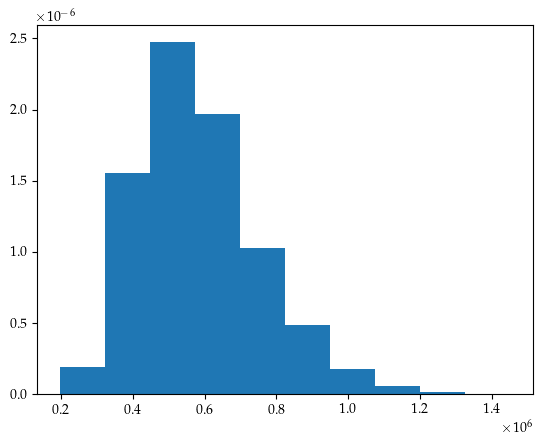

In [127]:
plt.figure()
plt.hist(total, density=True)
plt.show()

## Pick a Stock

In [173]:
symbol = 'AAPL'# 'NVDA' #  'JPM' # 'MSFT' # 'TSLA' #
start_date = '2010-01-01'
end_date = '2024-12-31'
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
df.ffill(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [174]:
close = df['Close']
price_year = [close[close.index.year == y].iloc[-1] for y in range(2010, 2024)]
price_year = pd.DataFrame(price_year, index=range(2010, 2024))
ratio_stock = 1.0 + price_year.pct_change().dropna()

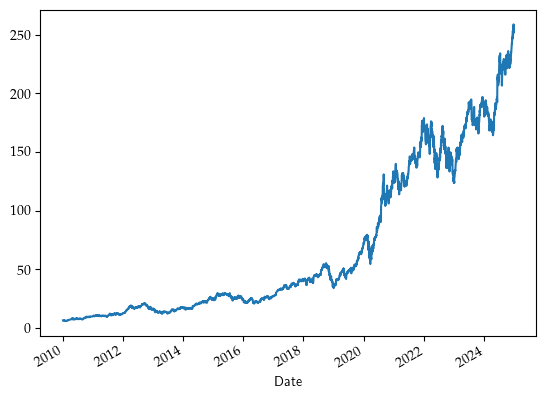

In [175]:
close.plot()
plt.show()

In [176]:
price_year

,0
2010,9.706992
2011,12.187905
2012,16.157129
2013,17.460936
2014,24.554005
2015,23.814018
2016,26.786104
2017,39.767811
2018,37.624252
2019,71.093956


In [177]:
ratio_stock

,0
2011,1.255580
2012,1.325669
2013,1.080695
2014,1.406225
2015,0.969863
2016,1.124804
2017,1.484643
2018,0.946098
2019,1.889578
2020,1.823067


In [ ]:
amnt_stock = np.array([10000] + [5000]*(len(ratio_stock)-1))
stock_total = compute_total(ratio_stock.values, amnt_stock)
print('Total amount:', amnt_stock.sum())
print(f'Total stock: {stock_total.item():.2f}')

Total amount: 70000
Total stock: 587847.63


## Assume a Consistent Return

In [189]:
nyears = 20
initial = 1000000
gain = 1.08
yearly_contribution = 100000
record = [initial]
for i in range(nyears):
    ratios = np.array([gain]*(i+1))
    amounts = np.array([initial] + [yearly_contribution]*i)
    total = compute_total(ratios, amounts)
    record.append(total)

In [190]:
record = np.array(record) / 1000

In [191]:
amounts.sum()

2900000

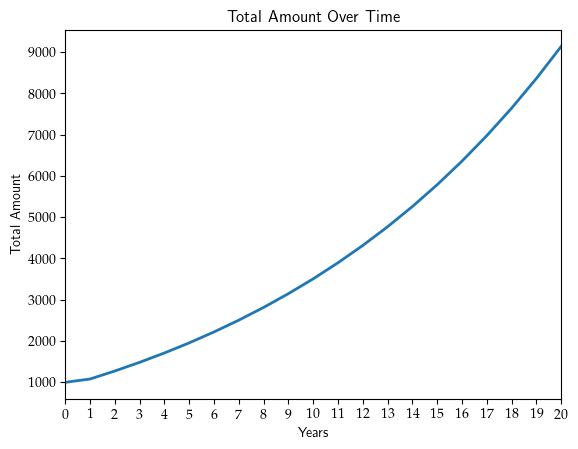

In [192]:
plt.plot(range(nyears+1), record, lw=2)
plt.title("Total Amount Over Time")
plt.xlabel("Years")
plt.ylabel("Total Amount")
plt.xlim(0, nyears)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.show()

In [193]:
record[-1]*0.04/12

30.4571785788698

## List of Stocks

In [ ]:
chosen = ['CVX', 'XOM',
          'WMT', 'COST', 'KO', 'PG', 'PM',
          'BAC', 'BRK-B', 'JPM', 'V', 'MA', 'WFC',
          'HD', 'AMZN', 'TM',
          'NFLX', 'TMUS']